<a href="https://colab.research.google.com/github/shmilyface/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Autism_Diagnosis_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adult Autism Screening Data Set: 
https://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult

Released: 2017

Analysis done by Stephanie Miller


##Summary

A screening was done to help individuals assess if they needed to connect with a mental health professional for symptoms of autism. The test assigns a maximum value of 1 per question, out of 10 questions. Different answers for questions gave different values. The assessment requires a 6 or higher for an individual to receive notice that they need further analysis. The goal was to verify if the assessment gave adequate questions for different individuals. Assessing mental health self-analysis is controversial, due to multiple studies showcasing a personal and biased opinion. Other studies argue that in the realm of reporting symptoms, self-assessments may be key in getting individuals the help they deserve. Ultimately, my findings, which show more women with symptoms above the threshold of a 6, despite having less women in the study, supports my concern that current testing does not adequately screen autism in women, based on the current statistics of men vs. women in autism (4.2 males to every female diagnosed on the spectrum). Much more comprehensive analysis is needed to prove trends or accuracy of spectrum tests. 



## Part 1: Initial Data Exploration for Autism Screening Test

**I am still working to get the visual showcasing the actual screening criteria that was asked, but so far I have not found a great way to guarantee a visual will show here. But it *is* on the blogpost: 
https://medium.com/@shmilyface/comparison-of-symptoms-of-autism-9d965bfefc3f

In [0]:
'''
Import and Creation of DataFrame

'''

import pandas as pd

columns = ['patient', 'sounds', 'big_picture', 'multitask', 'interrupt', 'social_comp', 'bored', 'reading_int', 'hyperfocus', 'read_faces',
           'intentions', 'age', 'gender', 'ethnicity', 'jaundice', 'family_autism', 'country', 'used_app', 'result', 'age_desc', 'relation', 'class/asd']

df = pd.read_csv('https://raw.githubusercontent.com/shmilyface/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/csv_result-Autism-Adult-Data.csv', header=0, names=columns)

##Column Removal##
df.drop(['jaundice', 'used_app', 'age_desc', 'relation', 'ethnicity'], axis=1, inplace=True)

df.head()


,patient,sounds,big_picture,multitask,interrupt,social_comp,bored,reading_int,hyperfocus,read_faces,intentions,age,gender,family_autism,country,result,class/asd
0,1,1,1,1,1,0,0,1,1,0,0,26,f,no,United States,6,NO
1,2,1,1,0,1,0,0,0,1,0,1,24,m,yes,Brazil,5,NO
2,3,1,1,0,1,1,0,1,1,1,1,27,m,yes,Spain,8,YES
3,4,1,1,0,1,0,0,1,1,0,1,35,f,yes,United States,6,NO
4,5,1,0,0,0,0,0,0,1,0,0,40,f,no,Egypt,2,NO


In [0]:
##DTYPES##

'''
✓ age = object. Change to int64
✓ gender = binary
✓ ethnicity = numeric values
✓ family_autism = binary
✓ country = numeric
✓ class/asd = binary
'''
#function to make dtypes numeric
def to_num(df, col):
  return df[col].replace(df[col].unique(), range(len(df[col].unique())))

df = df.replace('?', float('nan'))
df.age.fillna(method='ffill', inplace=True)
df.age = [int(r.age) for r in df.itertuples()] # for int64 goodness
df.age.replace(383, 38, inplace=True) # typo in data
df.replace(['no', 'NO'], 0, inplace=True)
df.replace(['yes', 'YES'], 1, inplace=True)
df.replace(['f', 'm'], [0, 1], inplace=True)
df.country = to_num(df, 'country')
df.dtypes

patient          int64
sounds           int64
big_picture      int64
multitask        int64
interrupt        int64
social_comp      int64
bored            int64
reading_int      int64
hyperfocus       int64
read_faces       int64
intentions       int64
age              int64
gender           int64
family_autism    int64
country          int64
result           int64
class/asd        int64
dtype: object

In [0]:
# Misc Info

print('Age Min:',
      df.age.min(), '\nAge Max:', df.age.max())
print('Unique Countries:',
      len(df.country.unique()))
print('Gender:\n',
      df.gender.value_counts())
#observation: Less women than men took screening. More women then men were diagnosed. 

Age Min: 17 
Age Max: 64
Unique Countries: 67
Gender:
 1    367
0    337
Name: gender, dtype: int64


In [0]:
# df2 - a tidier version for visualizations

#difference in data before/after tidying

meta = ['patient', 'age', 'gender', 'family_autism',
        'country', 'result', 'class/asd']
questions = ['sounds', 'big_picture', 'multitask', 'interrupt', 'social_comp',
             'bored', 'reading_int', 'hyperfocus', 'read_faces', 'intentions']
df2 = pd.melt(df, id_vars=meta, value_vars=questions,
              var_name='question', value_name='response')
df2['question'] = df2['question'].replace(
    df2['question'].unique(), range(len(df2['question'].unique())))
df2.head()

,patient,age,gender,family_autism,country,result,class/asd,question,response
0,1,26,0,0,0,6,0,0,1
1,2,24,1,1,1,5,0,0,1
2,3,27,1,1,2,8,1,0,1
3,4,35,0,1,0,6,0,0,1
4,5,40,0,0,3,2,0,0,1


In [0]:
# Gender - f/0 & m/1
import numpy as np
import matplotlib.pyplot as plt

#function to create bar charts utilizing the questions in the screening
    
def bar_char2(title, legend, btms, tops, ticks, size=[12,8], col='green'):
  ind = np.arange(len(ticks))
  plt.figure(figsize=size)
  p1 = plt.bar(ind, btms, 0.5, color=col)
  for p in p1.patches:
    w, h = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate('{:.0%}'.format(h), [x + 0.15, y + h + 0.03])
  p2 = plt.bar(ind, tops, 0.5, bottom=btms, color='whitesmoke')
  plt.title(title)
  plt.legend([p1[0], p2[0]], legend)
  plt.xticks(ind, ticks, rotation='vertical')
  plt.yticks([])
  for spine in plt.gca().spines.values():
    spine.set_visible(False)
  plt.show()



In [0]:
'''
Initial Visualization/Observations
'''
import seaborn as sns

#sns.pairplot(df) #lol that was the least helpful four dot pairplot ever

#Immediate question: What was the criteria for autism prior to this one? 
'''
Data published 2018
**What is the prevalence of this data?
**How does it compare to national average

For Reference: 
1943 - Leo Kanner "infantile autism"
1966 - 1 in 2500 based on Kanners desc
>>what was his criteria - Schizophrenia

Acquire ratios for every year from 1980 to 2019 and map
the trends between each new test implementation strategy

1980 - DSM - 6 criteria, 0 or 1 (Anything prior to this was schizophrenia)
1987 - New edition/ Expanded Diagnosis 8 of 16 criteria
1 in 1400
1991 - Diagnosis = Special Education Access Act
1994 - Inclusion of Aspergers
2013 - prior to release of this new edition in 2013, a diagnosis 
of autism was not given if the child also had ADHD

'''

#sns.pairplot(df2);

'\nData published 2018\n**What is the prevalence of this data?\n**How does it compare to national average\n\nFor Reference: \n1943 - Leo Kanner "infantile autism"\n1966 - 1 in 2500 based on Kanners desc\n>>what was his criteria - Schizophrenia\n\nAcquire ratios for every year from 1980 to 2019 and map\nthe trends between each new test implementation strategy\n\n1980 - DSM - 6 criteria, 0 or 1 (Anything prior to this was schizophrenia)\n1987 - New edition/ Expanded Diagnosis 8 of 16 criteria\n1 in 1400\n1991 - Diagnosis = Special Education Access Act\n1994 - Inclusion of Aspergers\n2013 - prior to release of this new edition in 2013, a diagnosis \nof autism was not given if the child also had ADHD\n\n'

For reference: 


http://www.unstrange.com/dsm1.html

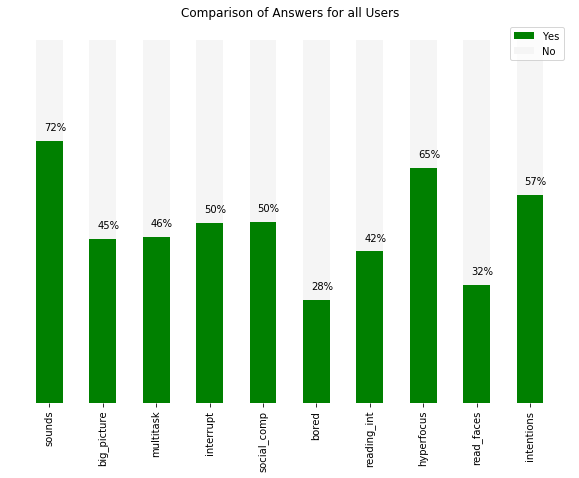

In [0]:
#df function to compare results of questions with other columns of interest

def bar_char(title, df, col='green'):
  yes_s = [df[q].value_counts()[1] / len(df[q]) for q in questions]
  no_s = [1 - p for p in yes_s]
  bar_char2(
      title, ['Yes', 'No'],
      yes_s, no_s, questions, [10, 7], col)

#Initial Observations

'''
sound most common attribute
hyperfocus next
intentions
interrupt
social comp
big_picture
multitask
gray is no, green is yes
'''

bar_char('Comparison of Answers for all Users',df)

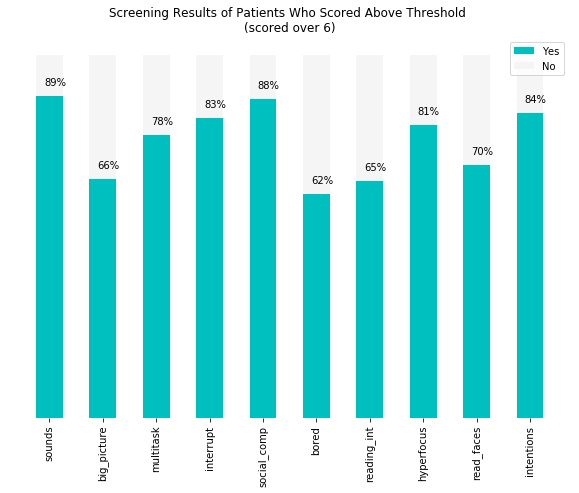

In [0]:


#plot the patients who have above threshold #'s, compare with those who don't 

bar_char('Screening Results of Patients Who Scored Above Threshold \n(scored over 6)', df[df['result'] >= 6], 'c')

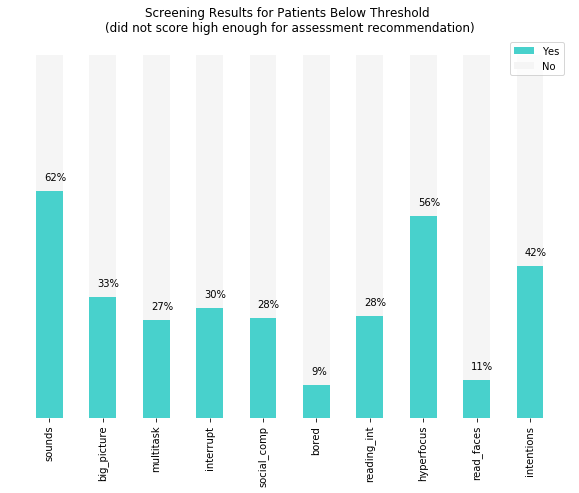

In [0]:
#Result less than diagnostic threshold


bar_char('Screening Results for Patients Below Threshold \n(did not score high enough for assessment recommendation)',df[df['result'] < 6], 'mediumturquoise')

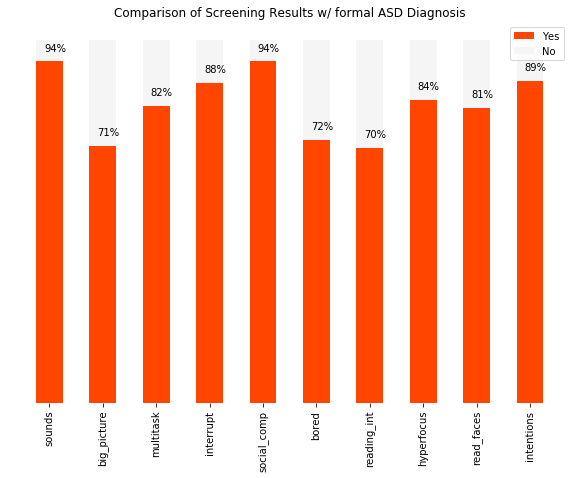

In [0]:
#then compare that with a Class/ASD 

'''
Observations:

'''

bar_char('Comparison of Screening Results w/ formal ASD Diagnosis', df[df['class/asd'] ==1], 'orangered') 

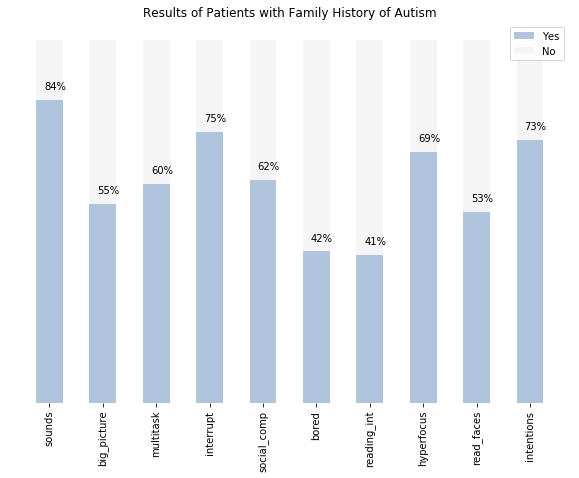

'\nObservations:\n\n'

In [0]:
#compare with family_autism

bar_char('Results of Patients with Family History of Autism', df[df['family_autism'] ==1], 'lightsteelblue'); 

'''
Observations:

'''

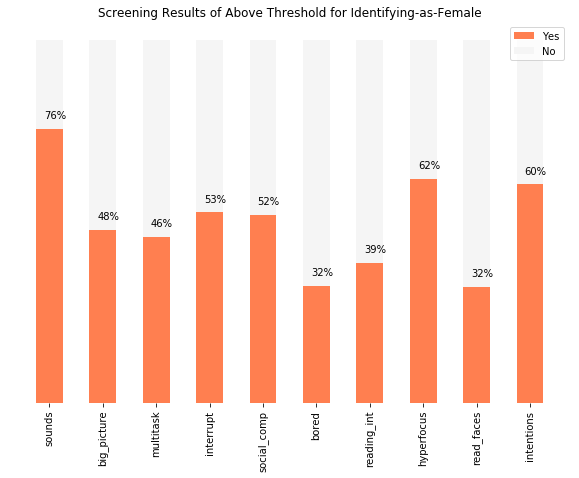

None


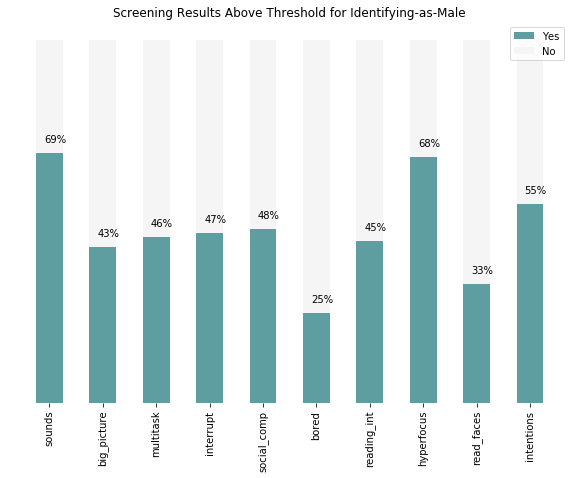

None


In [0]:
#compare diagnosis rates for men and women, are there comparisons between total scores, diagnosis, and gender?
#put in same graph


#female/responses
print(bar_char('Screening Results of Above Threshold for Identifying-as-Female', df[df['gender'] ==0], 'coral'));
#male/responses
print(bar_char('Screening Results Above Threshold for Identifying-as-Male', df[df['gender'] ==1], 'cadetblue') );

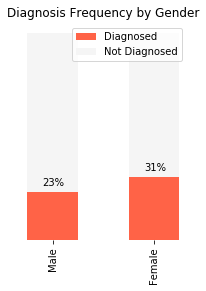

In [0]:
#gender versus class/asd

df_m = df2[df2.gender == 1]
df_f = df2[df2.gender == 0]

df_m_no = df_m[df_m['class/asd'] == 0]
df_f_no = df_f[df_f['class/asd'] == 0]
df_m_yes = df_m[df_m['class/asd'] == 1]
df_f_yes = df_f[df_f['class/asd'] == 1]

bar_char2(
    'Diagnosis Frequency by Gender', ['Diagnosed', 'Not Diagnosed'],
    [ df_m_yes.shape[0] / df_m.shape[0], df_f_yes.shape[0] / df_f.shape[0] ],
    [ df_m_no.shape[0] / df_m.shape[0], df_f_no.shape[0] / df_f.shape[0] ],
    ['Male', 'Female'], [3,4], 'tomato'
)

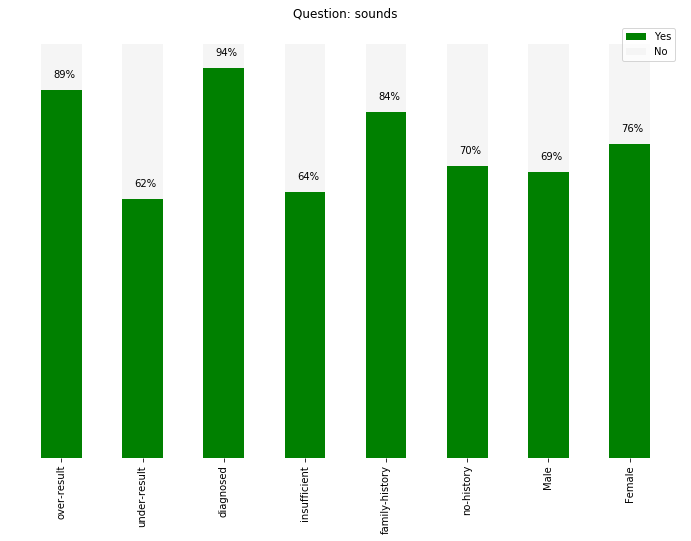

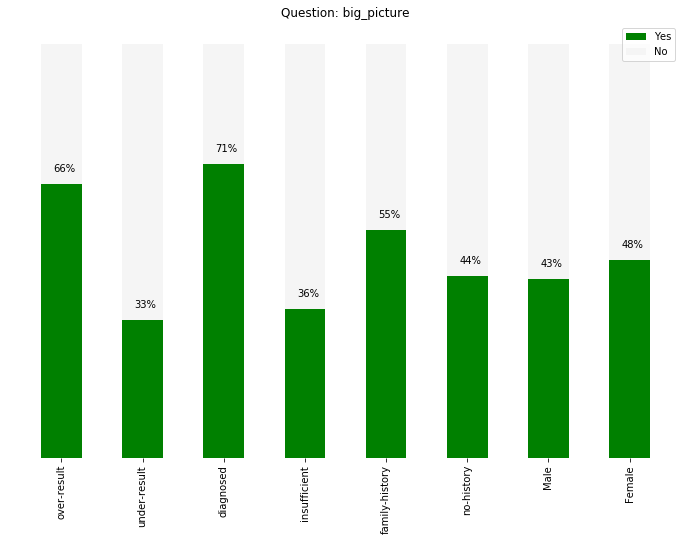

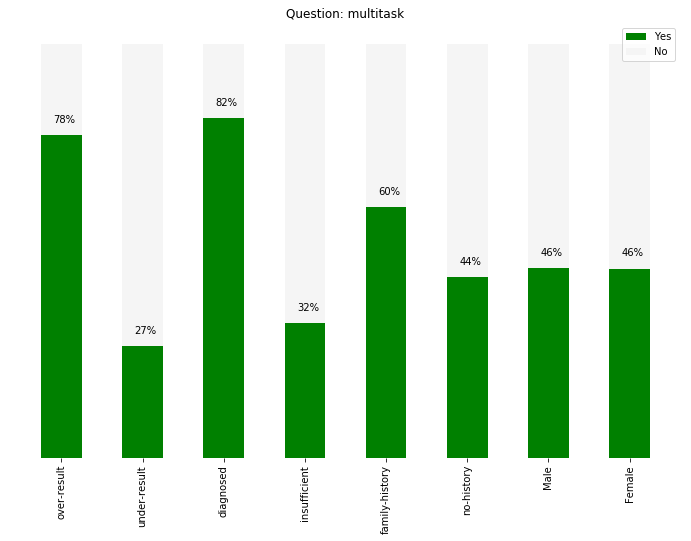

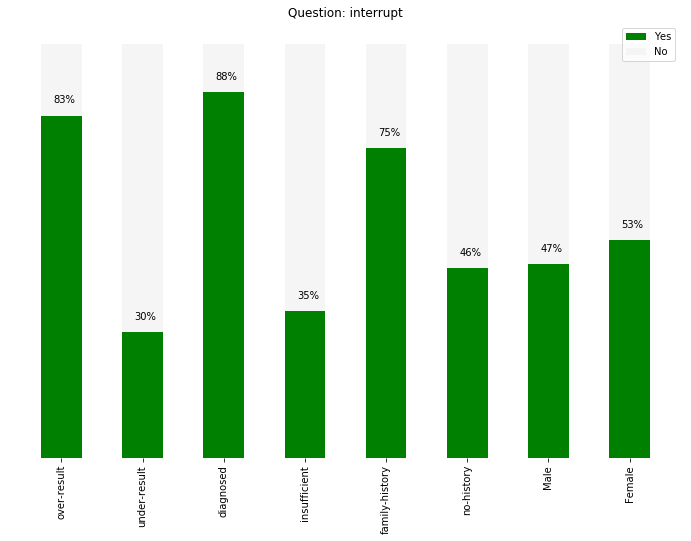

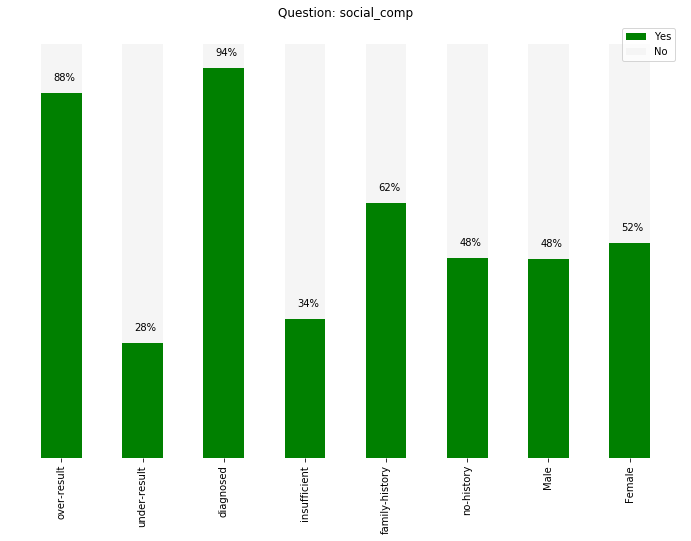

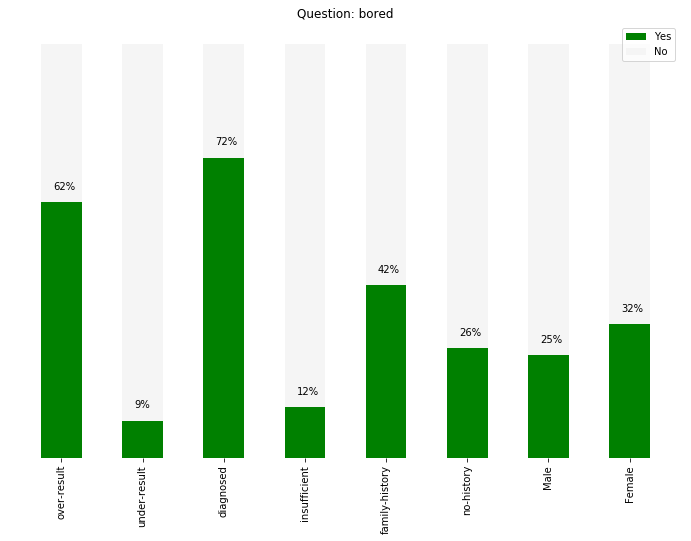

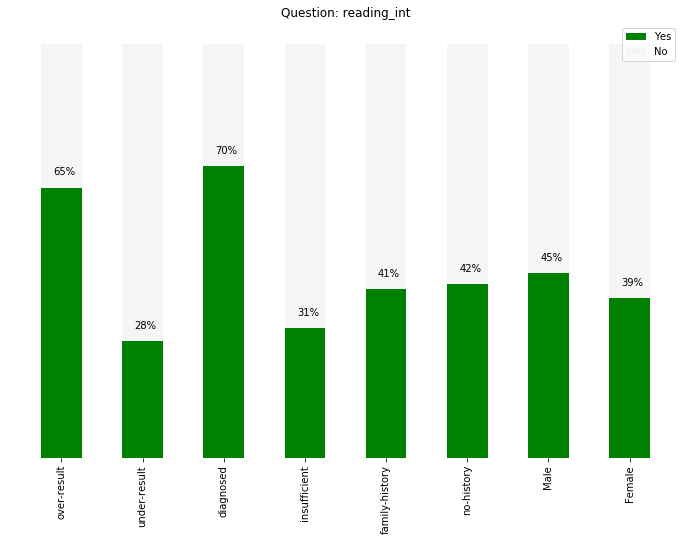

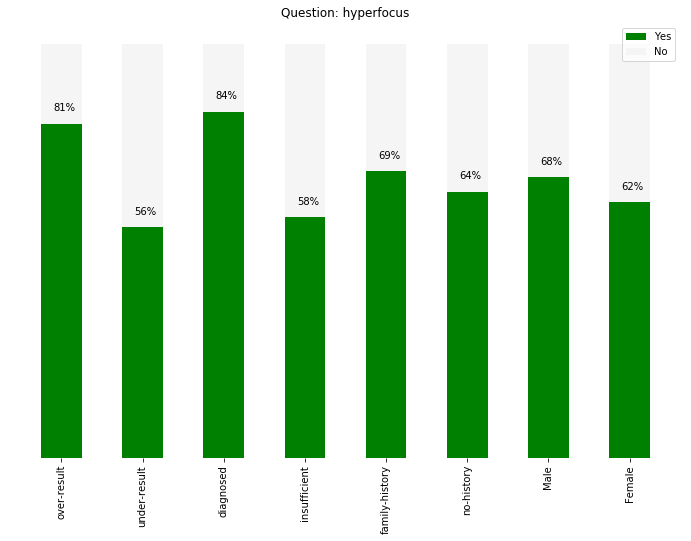

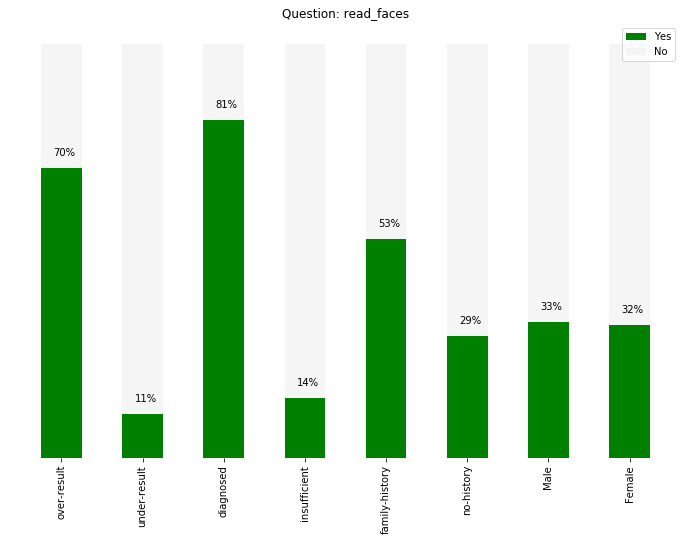

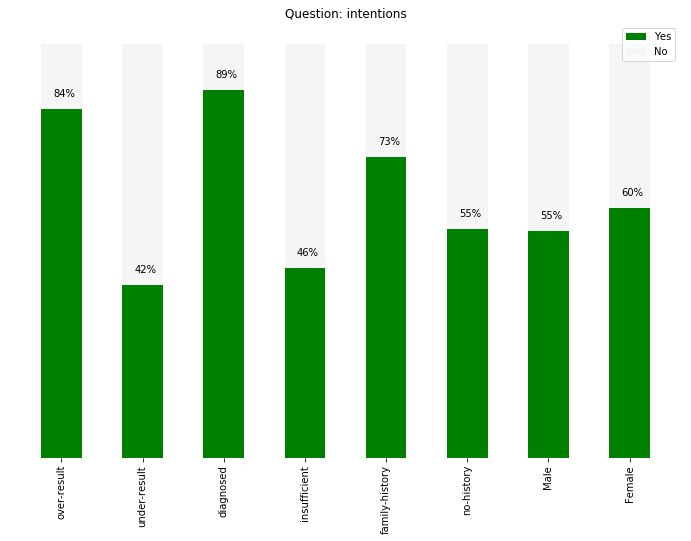

In [0]:
#a different way of organizing data, to see which one is easier to read/verify

# feats - 6-or-more, asd, 6-or-less, not-asd, family-history, not-family-history, male, female
df_by_feat = {
    'over-result': df[df.result >= 6],
    'under-result': df[df.result < 6],
    'diagnosed': df[df['class/asd'] == 1],
    'insufficient': df[df['class/asd'] == 0],
    'family-history': df[df.family_autism == 1],
    'no-history': df[df.family_autism == 0],
    'Male': df[df.gender == 1],
    'Female': df[df.gender == 0]
}

def calc_per(ser):
  return ser.value_counts()[1] / len(ser)
def bar_char3(q):
  yes_s = [calc_per(df[q]) for df in df_by_feat.values()]
  no_s = [1 - p for p in yes_s]
  bar_char2('Question: ' + q, ['Yes', 'No'], yes_s, no_s, df_by_feat.keys())

for q in questions:
  bar_char3(q)

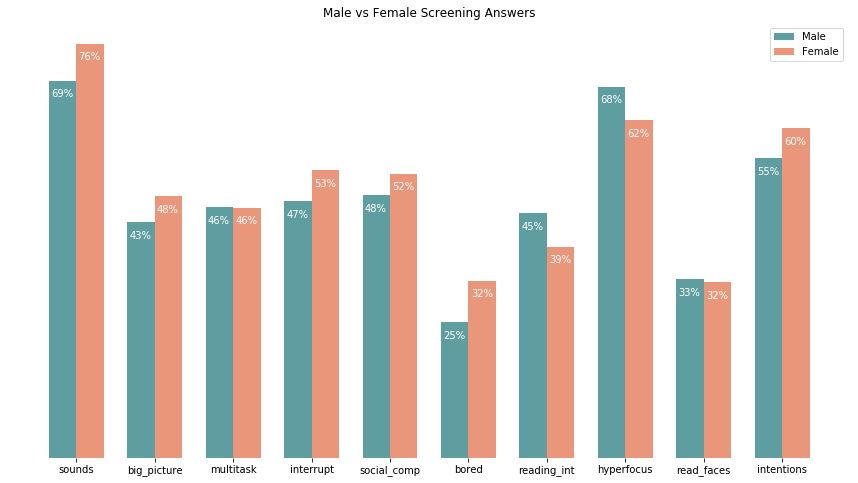

In [0]:
#creation of final visualizations for blog post, based on findings above



#def bar_char2(title, legend, btms, tops, ticks, size=[12,8], col='green'):
#  ind = np.arange(len(ticks))
#  plt.figure(figsize=size)
#  p1 = plt.bar(ind, btms, 0.5, color=col)
#  for p in p1.patches:
#    w, h = p.get_width(), p.get_height()
#    x, y = p.get_xy()
#    plt.annotate('{:.0%}'.format(h), [x + 0.15, y + h + 0.03])
#  p2 = plt.bar(ind, tops, 0.5, bottom=btms, color='whitesmoke')
#  plt.title(title)
#  plt.legend([p1[0], p2[0]], legend)
#  plt.xticks(ind, ticks, rotation='vertical')
#  plt.yticks([])
#  for spine in plt.gca().spines.values():
#    spine.set_visible(False)
#  plt.show()
def add_per(chart):
  for p in chart.patches:
    h = p.get_height()
    x, y = p.get_xy()
    plt.annotate('{:.0%}'.format(h), [x + 0.03, y + h - 0.03], color='white')

def bar_char_cf(title, lbl_a, df1, col_a, lbl_b, df2, col_b, ticks):
  index = np.arange(len(ticks))
  bar_width = 0.35
  fig, ax = plt.subplots(figsize=[15,8])
  a_s = [calc_per(df1[t]) for t in ticks]
  b_s = [calc_per(df2[t]) for t in ticks]
  a_bars = ax.bar(index, a_s, bar_width, label=lbl_a, color=col_a)
  b_bars = ax.bar(index + bar_width, b_s, bar_width, label=lbl_b, color=col_b)
  add_per(a_bars)
  add_per(b_bars)
  ax.set_xticks(index + bar_width / 2)
  ax.set_xticklabels(ticks)
  ax.set_yticks([])
  ax.set_yticklabels([])
  ax.set_title(title)
  ax.legend()
  for spine in plt.gca().spines.values():
    spine.set_visible(False)
  plt.show()

bar_char_cf(
    'Male vs Female Screening Answers',
    'Male', df_by_feat['Male'], 'cadetblue',
    'Female', df_by_feat['Female'], 'darksalmon',
    questions)

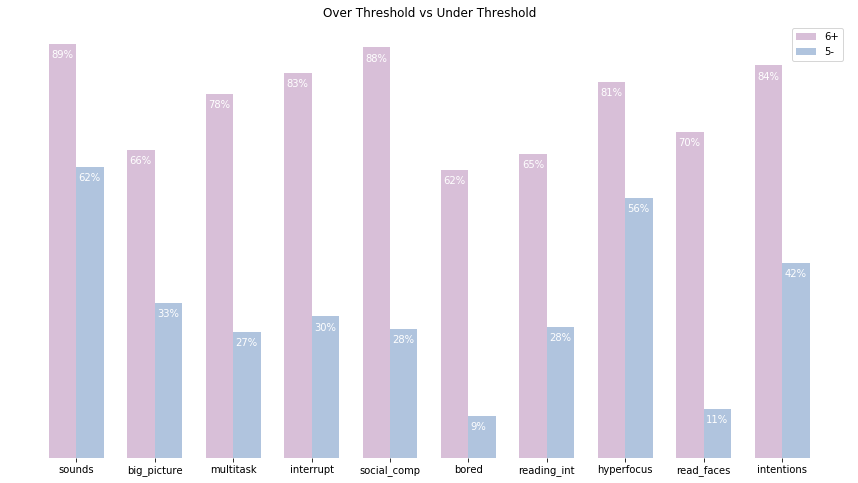

In [0]:
bar_char_cf(
    'Over Threshold vs Under Threshold',
    '6+', df_by_feat['over-result'], 'thistle',
    '5-', df_by_feat['under-result'], 'lightsteelblue',
    questions)

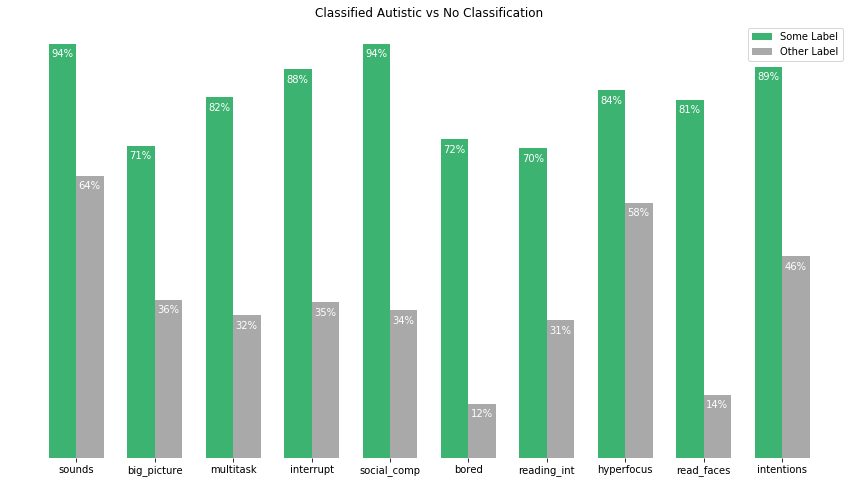

In [0]:
bar_char_cf(
    'Classified Autistic vs No Classification',
    'Some Label', df_by_feat['diagnosed'], 'mediumseagreen',
    'Other Label', df_by_feat['insufficient'], 'darkgrey',
    questions)

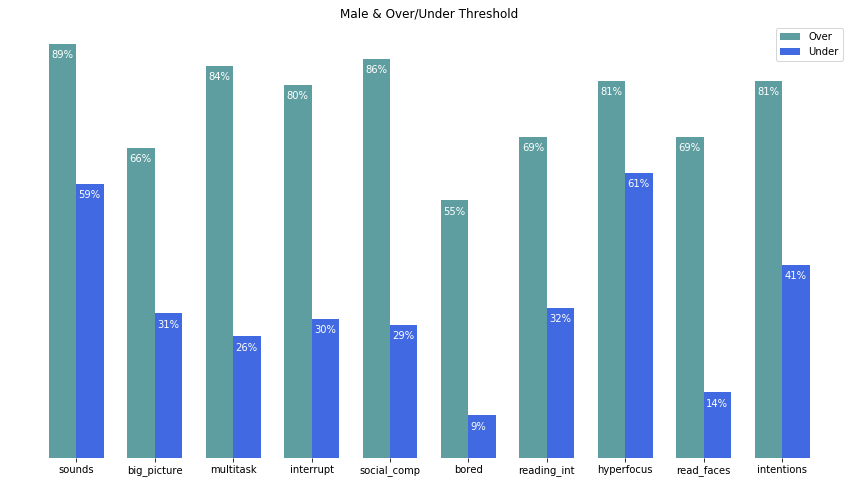

In [0]:
bar_char_cf(
    'Male & Over/Under Threshold',
    'Over', df_by_feat['Male'][df_by_feat['Male'].result >= 6], 'cadetblue',
    'Under', df_by_feat['Male'][df_by_feat['Male'].result < 6], 'royalblue',
    questions)

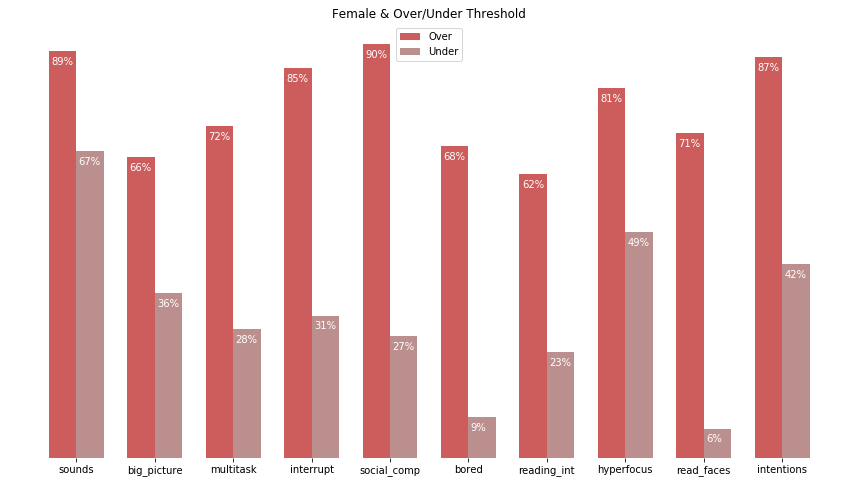

In [0]:
bar_char_cf(
    'Female & Over/Under Threshold',
    'Over', df_by_feat['Female'][df_by_feat['Female'].result >= 6], 'indianred',
    'Under', df_by_feat['Female'][df_by_feat['Female'].result < 6], 'rosybrown',
    questions)

Create a paragraph here about findings in the visualizations. Narrow down for story mode once we have all information settled. 

-What trends are we seeing

-gender has an impact

-results varied based on gender

-What surprised me

more women were diagnosed via the app, with a higher rate than men in this study. In comparison, current statistics show men are much more likely to hava autism. 

-missed diagnosis at younger age due to gender bias

-

-What questions does it raise

-how many males took the survey
-how many women took the survey
-ages of men and women
-comparison to NIMH data for autism




##Part Two: Past DSM criteria

In [0]:
#create a df for the different diagnostics over time back to 1980s

In [0]:
#compare the different diagnostic criteria using DSM
#how do we run the patient answers to the screenings, using only the information we have? 
#how can I calculate the probabilty of a patient being diagnosed with autism based on current information, 
#and previous criteria. We do have historic ratios as DSM's were released, to measure the diagnostics, if that helps. 

#create visualizations to show DSM criteria, as well as the ratio. (Timeline Visualization w/ graph showing ratio increase)